<a href="https://colab.research.google.com/github/charann90/Netflix-Movies-and-TV-Shows-Clustering/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do**




*   Exploratory Data Analysis

*   Understanding what type content is available in different countries

*   Has Netflix increasingly focused on TV as compared to movies in recent years?
*   Clustering similar content by matching text-based features





**Data Description**

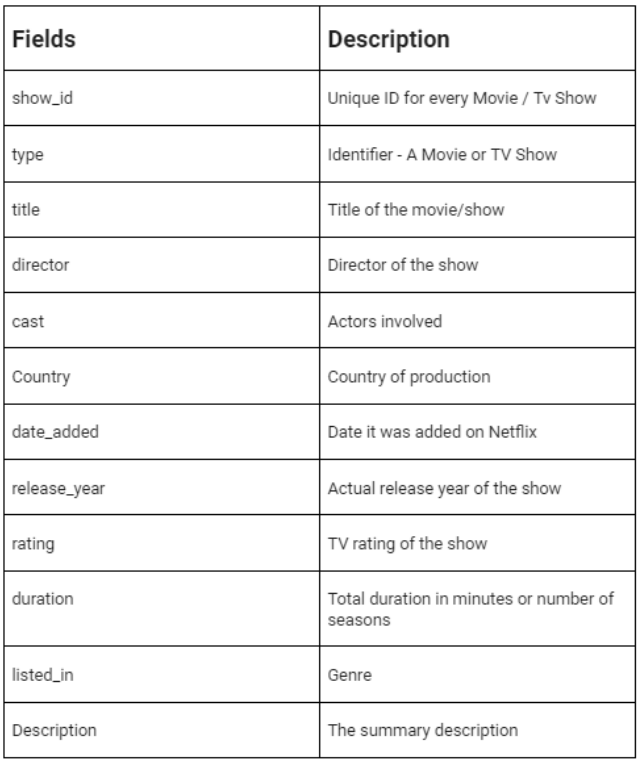

# Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data uploading

In [ ]:
#uploading and reading the data
df=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data Wrangling

In [ ]:
#getting the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#understanding the statistical information
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Data Cleaning

In [ ]:
#checking the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In the given data 5 features are having null values which need to be corrected

In [ ]:
#dropping and replacing null valuse for different columns

#dropping null values of date_added and rating column as it has only single digit null values
df.dropna(subset=['date_added','rating'],inplace=True)
#replacing null values in director column by unknown
df['director'].fillna('unknown',inplace=True)
#replacing null values in country column by mode value of it
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [ ]:
#dropping unnessasary columns
df.drop(['show_id','cast'],axis=1,inplace=True)

In [ ]:
#checking null values after cleaning
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# EDA

Type of content available in different countries:

In [ ]:
#count of type of content present in diffrent countries
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

We can see that movie content is double the number of TV shows

In [ ]:
import seaborn as sns

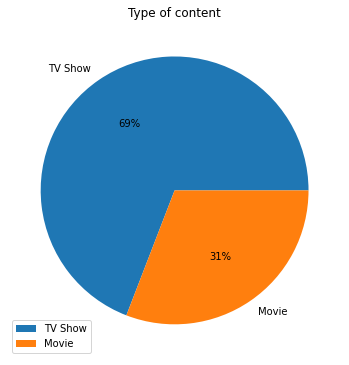

In [ ]:
#plotting the type of content in the form of pie plot
plt.figure(figsize=(6,7))
plt.pie(df['type'].value_counts(),labels=df['type'].unique(),autopct='%1.0f%%')
plt.title('Type of content')
plt.legend()
plt.show()

In [ ]:
#replacing and converting datatype of duration column to integer

df['duration']=df['duration'].str.replace('Season','')
df['duration']=df['duration'].str.replace('s','')

In [ ]:
#Replacing and converting datatype of duration column to integer
df['duration']=df['duration'].str.replace('min','')

df['duration']=df['duration'].astype(str).astype(int)

In [ ]:
#creating a variable column for each type seperately
tv_shows=df[df['type']=='TV Show']
movie=df[df['type']=='Movie']

In [ ]:
#count of movie and tv shows for different countries
df['country'].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
#crreating a movie variable for seperated type of content grouping with countries
country_movie=pd.DataFrame(movie.groupby(['country'])['type'].size().sort_values(ascending=False))

In [ ]:
#renaming the column
country_movie.rename(columns={'type':'count'})

,count
country,
United States,2076
India,852
United Kingdom,193
Canada,118
Spain,89
...,...
"India, Switzerland",1
"India, Pakistan",1
"India, Nepal",1


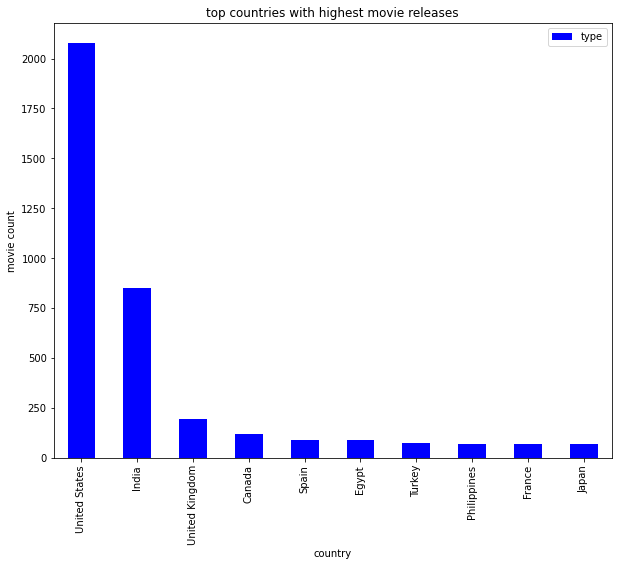

In [ ]:
#plotting movie counts of top countries
country_movie.head(10).plot(kind='bar',figsize=(10,8),title='top countries with highest movie releases',color='b',ylabel='movie count')



**United Nations has highest movie content released and then followed by India** 




In [ ]:
#creating a tvshow  variable for seperated tv shows type of content grouping with countries

country_tvshow=pd.DataFrame(tv_shows.groupby(['country'])['type'].size().sort_values(ascending=False))

In [ ]:
#renaming the column
country_tvshow.rename(columns={'type':'count'})

,count
country,
United States,975
United Kingdom,203
Japan,155
South Korea,147
India,71
...,...
"Mexico, Spain",1
"China, Hong Kong",1
"Mauritius, South Africa",1


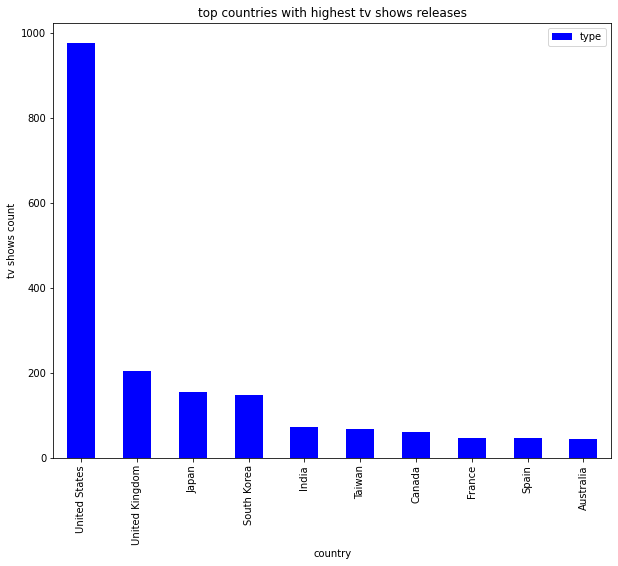

In [ ]:
#plotting tv show counts of top countries
country_tvshow.head(10).plot(kind='bar',figsize=(10,8),title='top countries with highest tv shows releases',color='b',ylabel='tv shows count')

 **United Nations has highest tv show content released and then followed by United Kingdom**





---





In [ ]:
num_col=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']

In [ ]:
#comparing type of content in different years
release_df=df.groupby(['release_year','type'])['release_year'].count().unstack()

In [ ]:
release_df.tail(10)

type,Movie,TV Show
release_year,,
2012,158.0,60.0
2013,202.0,63.0
2014,244.0,90.0
2015,380.0,156.0
2016,642.0,239.0
2017,742.0,268.0
2018,734.0,386.0
2019,582.0,414.0
2020,411.0,457.0


Text(0.5, 0, 'Release year ')

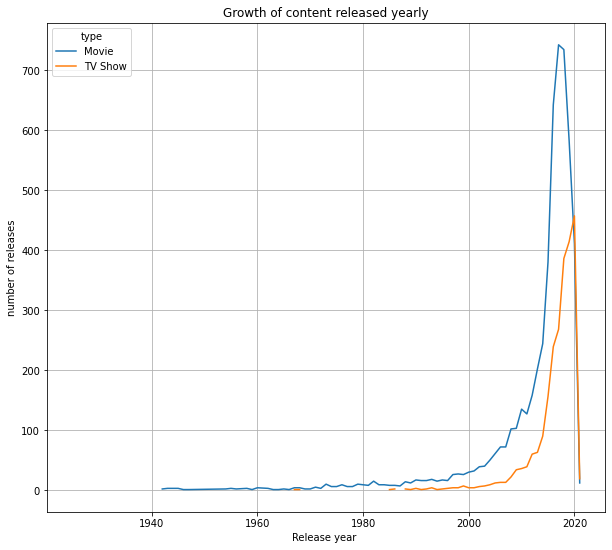

In [ ]:
#plotting sum of contentent released in different years
release_df.plot(figsize=(10,9),grid=True)
plt.title('Growth of content released yearly')
plt.ylabel('number of releases')
plt.xlabel('Release year ')



*   Netflix started releasing movies after 1940 and after 1980 Tv show content was started streaming.
*   we can see that there is a graduall increase in releases after 2000 where movie content releases are more then Tv show content




In [ ]:
#creating seperate columns for month and year from release date column
df['month']=pd.DatetimeIndex(df['date_added']).month
df['year']=pd.DatetimeIndex(df['date_added']).year
df.drop(['release_year'],axis=1,inplace=True)

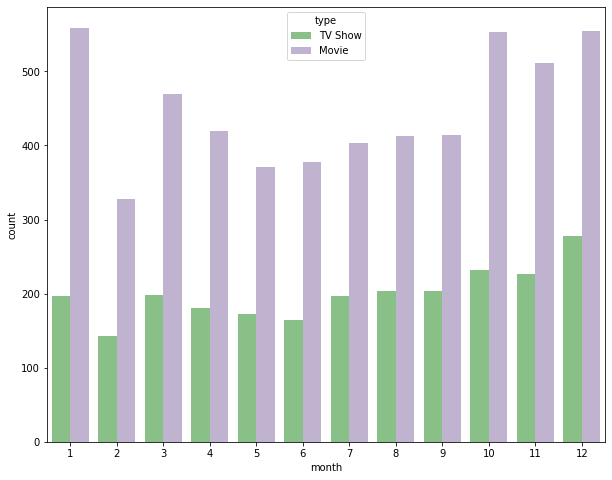

In [ ]:
#plotting monthly content released for both movies and Tv shows
plt.figure(figsize=(10,8))
sns.countplot(x='month',hue='type',data=df,palette="Accent")



*   It is concluded that in the month of january, october and december maximum 
movies/tvshows has been released.




**Top TV type with respect to duration**

In [ ]:
#plotting distribution plot for duration to see the frequency distribution 
plt.figure(figsize=(10,8))
sns.distplot(df['duration'],bins=30)
plt.title('length distribution of movies',fontsize=15)

NameError: ignored

The mean duration of movies are 100 minutes

In [ ]:
#creating a table for movies with highest duration
long_movies=movie[['title','duration']]
long_movies.sort_values(by=['duration'],ascending=False)

,title,duration
957,Black Mirror: Bandersnatch,312
6850,The School of Mischief,253
4490,No Longer kids,237
3694,Lock Your Girls In,233
5108,Raya and Sakina,230
...,...,...
463,American Factory: A Conversation with the Obamas,10
1203,Canvas,9
1501,Cops and Robbers,8
5694,Sol Levante,5




*   Black Mirror: Bandersnatch	is the longest movie which is 312 minutes long and the second is The School of Mischief	.




In [ ]:
#creating a table for Tv shows with highest duration
long_tv_shows=tv_shows[['title','duration']]
long_tv_shows.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
...,...,...
3563,Learning Songs by Little Baby Bum: Nursery Rhy...,1
3550,Laws of Attraction,1
3548,Lavender,1
610,Atelier,1




*  Grey's Anatomy		is longest Tv show which has 16 seasons and followed by Supernatural which has 15 seasons




**Most occured Categories for movies and Tv shows**

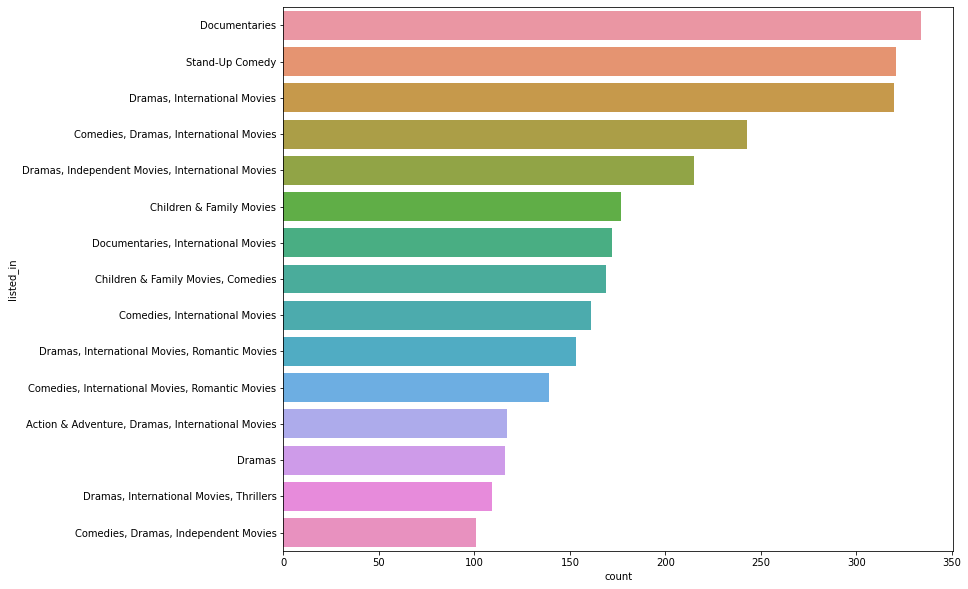

In [ ]:
#top categories of movies
plt.figure(figsize=(12,10))
sns.countplot(y=movie['listed_in'],data=df,order=movie['listed_in'].value_counts().index[:15])



*   Movies which are documentaries and stand up comedy has highest content in netflix



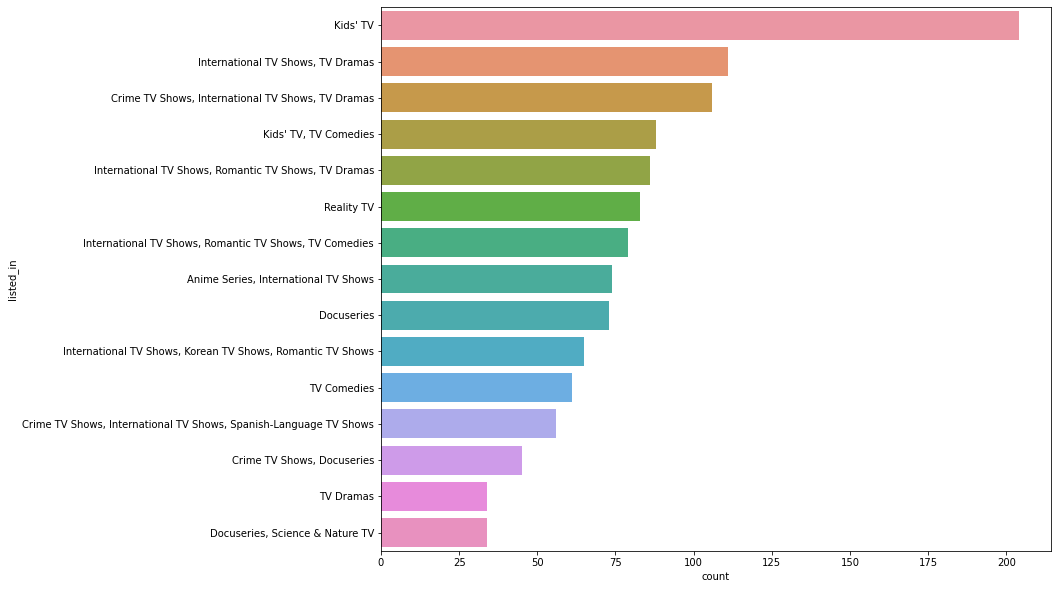

In [ ]:
#top categories of Tv shows
plt.figure(figsize=(12,10))
sns.countplot(y=tv_shows['listed_in'],data=df,order=tv_shows['listed_in'].value_counts().index[:15])



*   Tv shows for kids category has highest content in netflix




**Most popular ratings for Tvshows/Movies**



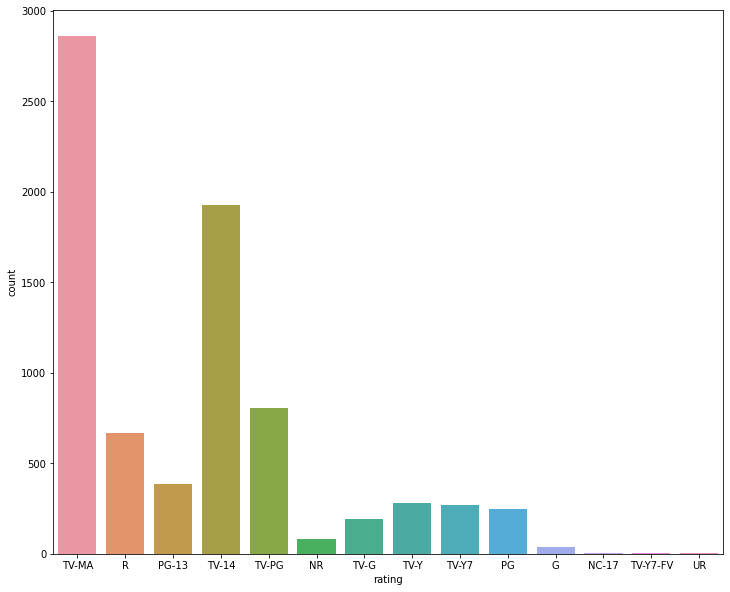

In [ ]:
#plotting top movie content rating 
plt.figure(figsize=(12,10))
sns.countplot(df['rating'])



*   Most of the contents got rating TV_MA(Mature Audience) and the second most rated contents is for Tv-14(excludes children)



In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


In [ ]:
df.shape

(7770, 13)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


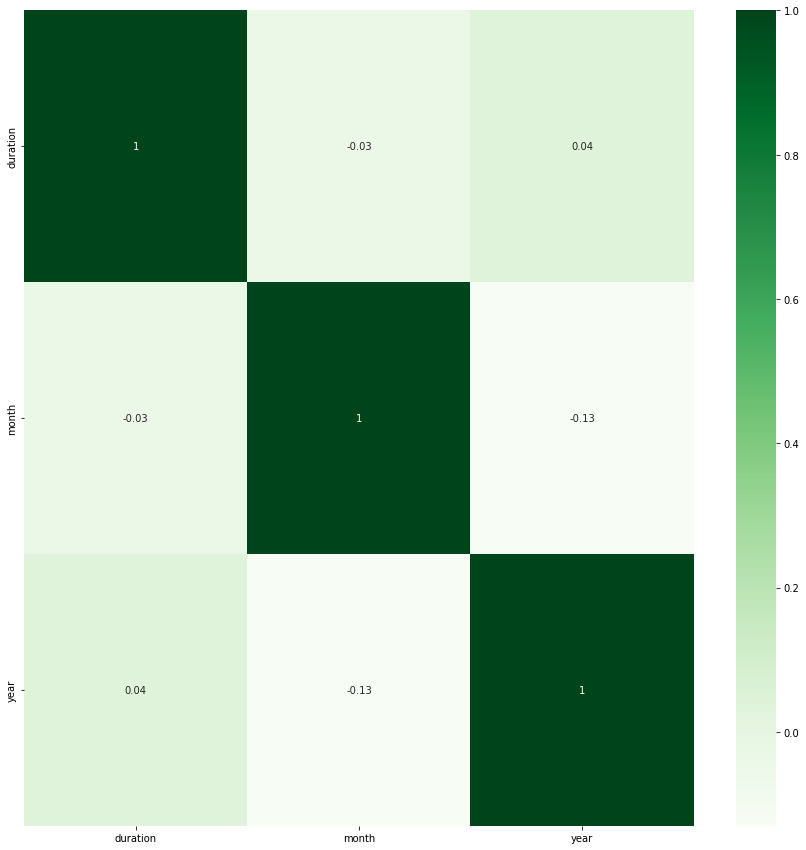

In [ ]:
#plotting heat map to find out strengnth between the variables
plt.figure(figsize=(15,15))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
clustered_df=df[['title']]
clustered_df['clustered_data']=(df['description']+' '+df['listed_in'])
clustered_df.set_index('title',inplace=True)
clustered_df.head()

,clustered_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [ ]:
import string

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_punctuations(text):
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

In [ ]:
clustered_df['clustered_data']=clustered_df['clustered_data'].apply(remove_punctuations)

In [ ]:
clustered_df['clustered_data']

title
3%                                         In a future where the elite inhabit an island ...
7:19                                       After a devastating earthquake hits Mexico Cit...
23:59                                      When an army recruit is found dead his fellow ...
9                                          In a postapocalyptic world ragdoll robots hide...
21                                         A brilliant group of students become cardcount...
                                                                 ...                        
Zozo                                       When Lebanons Civil War deprives Zozo of his f...
Zubaan                                     A scrappy but poor boy worms his way into a ty...
Zulu Man in Japan                          In this documentary South African rapper Nasty...
Zumbo's Just Desserts                      Dessert wizard Adriano Zumbo looks for the nex...
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    This documentary delv

In [ ]:
#stop_words=str(stopwords.words('english'))
sw = nltk.corpus.stopwords.words('english')


In [ ]:
def stopword(txt):
  description=[word.lower() for word in txt.split() if word.lower() not in sw]
  return ' '.join(description)

In [ ]:
clustered_df['clustered_data']=clustered_df['clustered_data'].apply(stopword)

In [ ]:
clustered_df['clustered_data']

title
3%                                         future elite inhabit island paradise far crowd...
7:19                                       devastating earthquake hits mexico city trappe...
23:59                                      army recruit found dead fellow soldiers forced...
9                                          postapocalyptic world ragdoll robots hide fear...
21                                         brilliant group students become cardcounting e...
                                                                 ...                        
Zozo                                       lebanons civil war deprives zozo family hes le...
Zubaan                                     scrappy poor boy worms way tycoons dysfunction...
Zulu Man in Japan                          documentary south african rapper nasty c hits ...
Zumbo's Just Desserts                      dessert wizard adriano zumbo looks next “willy...
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    documentary delves my

In [ ]:
def tokenizer(text):
  word_tokens=word_tokenize(text)
  return word_tokens

clustered_df['clustered_data']=clustered_df['clustered_data'].apply(tokenizer)

In [ ]:
clustered_df['clustered_data']

title
3%                                         [future, elite, inhabit, island, paradise, far...
7:19                                       [devastating, earthquake, hits, mexico, city, ...
23:59                                      [army, recruit, found, dead, fellow, soldiers,...
9                                          [postapocalyptic, world, ragdoll, robots, hide...
21                                         [brilliant, group, students, become, cardcount...
                                                                 ...                        
Zozo                                       [lebanons, civil, war, deprives, zozo, family,...
Zubaan                                     [scrappy, poor, boy, worms, way, tycoons, dysf...
Zulu Man in Japan                          [documentary, south, african, rapper, nasty, c...
Zumbo's Just Desserts                      [dessert, wizard, adriano, zumbo, looks, next,...
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    [documentary, delves,

Text(0.5, 1.0, 'word cloud')

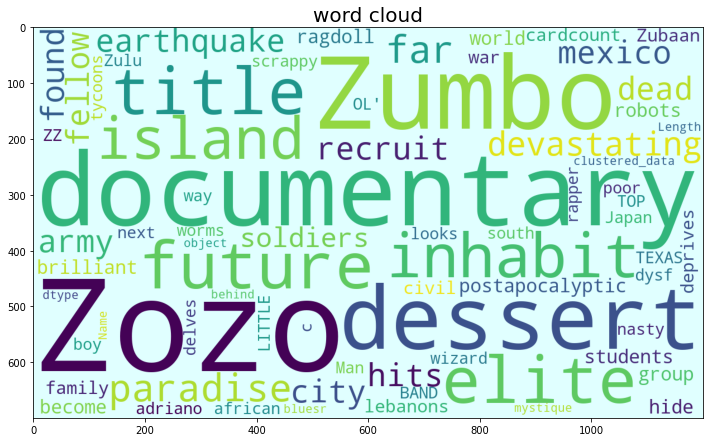

In [ ]:
from wordcloud import WordCloud

wordcloud=WordCloud(background_color = 'black',width = 1200,height = 700).generate(str(clustered_df['clustered_data']))

plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.title('word cloud',fontsize=20)


In [ ]:
from nltk.stem import PorterStemmer


In [ ]:
stemmer = PorterStemmer()

In [ ]:
def stemming(text):
  description=[stemmer.stem(word) for word in text]
  return ' '.join(description)

In [ ]:
clustered_df['clustered_data']=clustered_df['clustered_data'].apply(stemming)

In [ ]:
clustered_df['clustered_data'].head()

title
3%       futur elit inhabit island paradis far crowd sl...
7:19     devast earthquak hit mexico citi trap survivor...
23:59    armi recruit found dead fellow soldier forc co...
9        postapocalypt world ragdol robot hide fear dan...
21       brilliant group student becom cardcount expert...
Name: clustered_data, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
count_vectorizer=CountVectorizer()
cv=count_vectorizer.fit(clustered_df['clustered_data'])

#sum_words=cv.sum(axis=0)

dictionary=cv.vocabulary_.items()

In [ ]:
dictionary

dict_items([('futur', 5123), ('elit', 4095), ('inhabit', 6481), ('island', 6651), ('paradis', 9354), ('far', 4571), ('crowd', 3119), ('slum', 11704), ('get', 5273), ('one', 9077), ('chanc', 2344), ('join', 6833), ('save', 11054), ('squalor', 12013), ('intern', 6558), ('tv', 13137), ('show', 11498), ('drama', 3844), ('scifi', 11120), ('fantasi', 4567), ('devast', 3519), ('earthquak', 3984), ('hit', 6029), ('mexico', 8139), ('citi', 2551), ('trap', 13001), ('survivor', 12405), ('walk', 13723), ('life', 7423), ('wait', 13711), ('rescu', 10569), ('tri', 13029), ('desper', 3491), ('stay', 12094), ('aliv', 615), ('movi', 8485), ('armi', 958), ('recruit', 10407), ('found', 4956), ('dead', 3311), ('fellow', 4663), ('soldier', 11803), ('forc', 4908), ('confront', 2837), ('terrifi', 12673), ('secret', 11185), ('that', 12704), ('haunt', 5806), ('jungl', 6905), ('train', 12981), ('camp', 2119), ('horror', 6125), ('postapocalypt', 9833), ('world', 14043), ('ragdol', 10226), ('robot', 10763), ('hide

In [ ]:
word=[]
count=[]
for value, key in dictionary:
  word.append(value)
  count.append(key)

In [ ]:
freq_df=pd.DataFrame({'word':word,'count':count}).sort_values(by='count',ascending=False)
freq_df

,word,count
13748,şeref,14287
7791,ōarai,14286
9183,łukasz,14285
8305,überelit,14284
8692,über,14283
...,...,...
6312,1000,4
602,100,3
5832,10,2
6061,009,1


In [ ]:
top_words=freq_df.head(20)

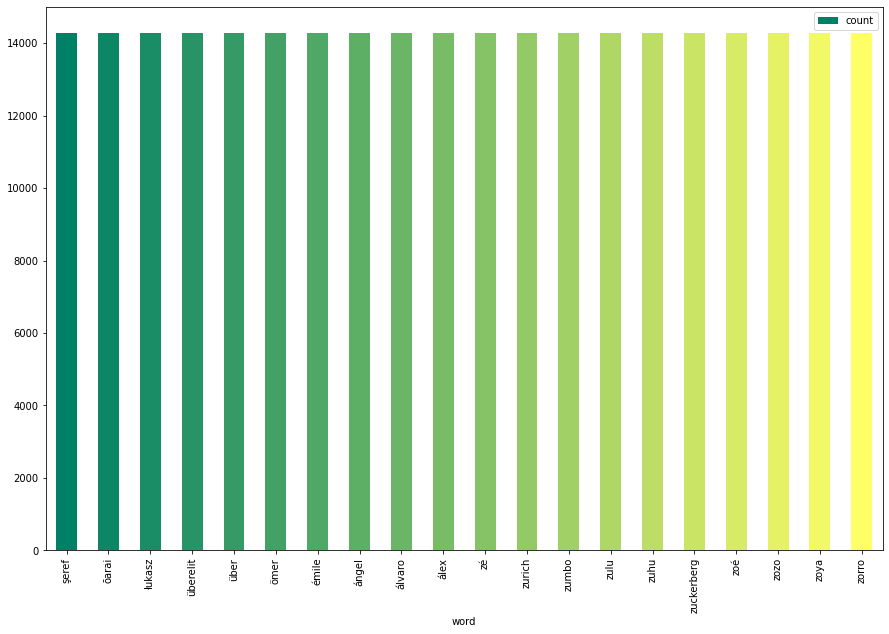

In [ ]:
top_words.plot(kind='bar',x='word',y='count',figsize=(15,10),color = plt.cm.summer(np.linspace(0, 1, 20)))